# CS3244 Project 2

## Part I - Importing of Materials

### Importing of Packages


In [1]:
!pip install scikit-optimize
!pip install tensorflow
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install -U nltk
!pip install contractions
!pip install wordcloud
!pip install -q -U keras-tuner
!pip install bert
!pip install transformers
!pip install --upgrade tensorflow_hub
!pip install torch

import numpy as np
import pandas as pd
import re
import string
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import bz2

#!pip install contractions
import contractions

#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

#!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem.regexp import RegexpStemmer

import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics

#!pip install scikit-optimize
import skopt
from skopt import BayesSearchCV


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hungy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hungy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hungy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hungy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
import numpy as np
import math
import pandas as pd
import re
import os
import string
import contractions
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import bz2
import keras 
import string
import nltk
import keras_tuner as kt

from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, TimeDistributed, Bidirectional, Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.utils.np_utils import to_categorical
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer # decided that Lemmatizer is better
from nltk.stem import WordNetLemmatizer 


from wordcloud import WordCloud,STOPWORDS



from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem.regexp import RegexpStemmer

import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
#
import skopt
from skopt import BayesSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hungy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hungy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hungy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hungy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#### Importing of Train Dataset

In [2]:
train_label = []
train_review = []

with open('train.ft.txt', encoding = 'utf-8') as f:
  train_lines = f.readlines()
for line in train_lines:
  train_label.append(int(line[9]) - 1) # Label 0 if negative, 1 if positive
  train_review.append(line[11:])
  if len(train_label) == 100000:
    break

d_train = {'Reviews':train_review,'Label':train_label}
df_train = pd.DataFrame(d_train)

#df_train.info()

#### Importing of Test Dataset

In [3]:
test_label = []
test_review = []

with open('test.ft.txt', encoding = 'utf-8') as f:
  test_lines = f.readlines()
for line in test_lines:
  test_label.append(int(line[9]) - 1) # Label 0 if negative, 1 if positive
  test_review.append(line[11:])
  if len(test_label) == 25000:
    break

d_test = {'Reviews':test_review,'Label':test_label}
df_test = pd.DataFrame(d_test)

#df_test.info()

## Part II - Exploratory Data Analysis

#### Training Set

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


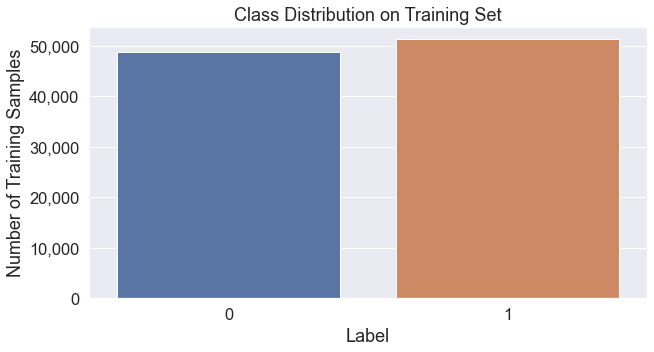

In [8]:
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

#Plot the number of tokens of each length.
ax = sns.countplot(train_label)

plt.title('Class Distribution on Training Set')
plt.xlabel('Label')
plt.ylabel('Number of Training Samples')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

#### Test Set

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


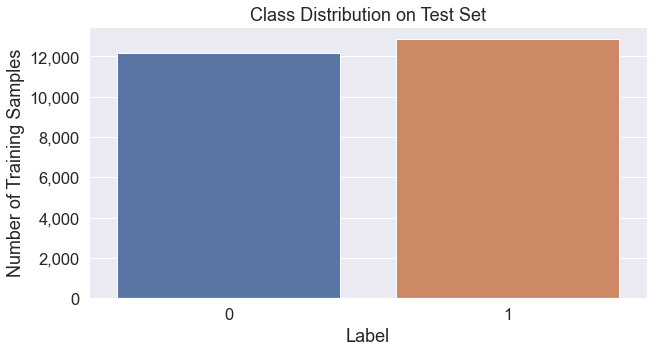

In [9]:
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

#Plot the number of tokens of each length.
ax = sns.countplot(test_label)

plt.title('Class Distribution on Test Set')
plt.xlabel('Label')
plt.ylabel('Number of Training Samples')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

**Observations**:

Both our training and test dataset is fairly balanced with approximately equal number of labels in the datasets. This will ensure that our models are not biased towards any of the labels and hence no additional techniques such as oversampling is needed to handle imbalanced classes. 

### No. of Words in Reviews Frequency Distribution


#### Training Dataset

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'No. of Words in Reviews Frequency Distribution - Training Set')

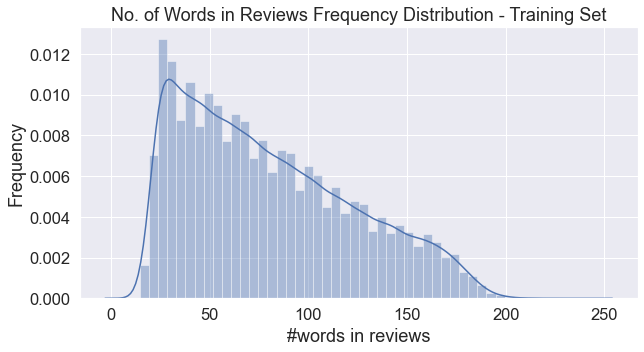

In [10]:
#Let’s count number of words in reviews and see it distribution
train_sentences_size = list(map(lambda x: len(x.split()), train_review))

sns.distplot(train_sentences_size)
plt.xlabel("#words in reviews")
plt.ylabel("Frequency")
plt.title("No. of Words in Reviews Frequency Distribution - Training Set")

#### Test Dataset

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'No. of Words in Reviews Frequency Distribution - Test Set')

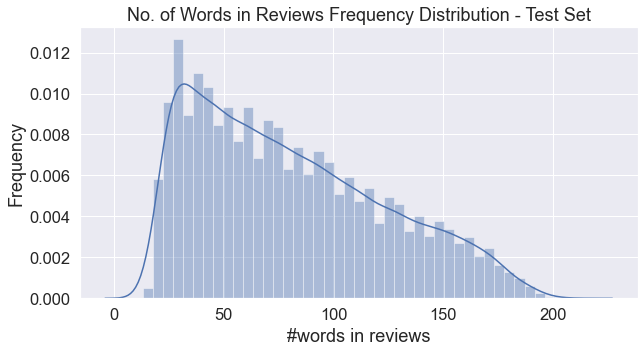

In [11]:
#Let’s count number of words in reviews and see it distribution
test_sentences_size = list(map(lambda x: len(x.split()), test_review))

sns.distplot(test_sentences_size)
plt.xlabel("#words in reviews")
plt.ylabel("Frequency")
plt.title("No. of Words in Reviews Frequency Distribution - Test Set")



In [10]:
average_input_size = math.ceil(sum(train_sentences_size)/len(train_sentences_size))
print(f"The average sentence length is {average_input_size}. This will serve as the number of features for our SOTA model")

The average sentence length is 80. This will serve as the number of features for our SOTA model


**Observations**:

Both training and test datasets are have a similar distribution in terms of their number of words per review. This indicates that word counts of the reviews does not reveal the sentiments of the reviews.

### Wordcloud

An additional EDA we can perform is to generate a world cloud based on reviews from the train dataset. Word cloud creates visualisation based on frequency of occurence of word in review and this could give us an idea of the most commonly words used in the reviews of each label. 

In order to produce the word cloud we perform the following operation on the text reviews, text cleaning needs to be performed beforehand, and these are the steps that we have taken to do so:
- Remove URLS
- Remove hashtags
- Converts all words to lowercases
- Spell out contractions
- Remove punctuations
- Remove numbers
- Remove special characters

In [11]:
stop_words = set(stopwords.words('english'))
stop_words.remove("no")
stop_words.remove("not")

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text=text.apply(lambda x: re.sub('https?://\S+|www\.\S+|\S+\.com', '',x)) # Remove URLs
    text=text.apply(lambda x: re.sub(r'@\S*', '', x)) # Remove hashtags and tags
    text=text.apply(lambda x: x.lower()) #all words to lowercase
    text=text.apply(lambda x: contractions.fix(x))# Spell out contractions
    text=text.apply(lambda x: re.sub(r"[_\,\>\(\-:\)\\\/\!\.\^\!\:\];='#]",'',x)) #Remove punctuation
    text=text.apply(lambda x: re.sub(r'\w*\d\w*', '',x)) #Remove numbers
    text=text.apply(lambda x: re.sub('[^a-zA-z0-9\s]', '' , x)) # Remove special characters
    text = text.apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split() if word not in stop_words])) #Lemmatize words
    return text


def clean_text_LSTM(text):
    text=text.apply(lambda x: re.sub('https?://\S+|www\.\S+|\S+\.com', '',x)) # Remove URLs
    text=text.apply(lambda x: re.sub(r'@\S*', '', x)) # Remove hashtags and tags
    text=text.apply(lambda x: x.lower()) #all words to lowercase
    text=text.apply(lambda x: re.sub(r'\w*\d\w*', '',x)) #Remove numbers
    text=text.apply(lambda x: re.sub('[^a-zA-Z0-9\s\.\?\!\,\']+', '' , x)) # Remove special characters, 
    #except certain punctuation
    return text

In [12]:
df_train['text']= clean_text(df_train['Reviews'])
df_test['text']= clean_text(df_test['Reviews'])
df_train['text_adv']= clean_text_LSTM(df_train['Reviews'])
df_test['text_adv']= clean_text_LSTM(df_test['Reviews'])

In [13]:
print("Sample of unclean text: \n", df_train['Reviews'][0])
print("Sample of cleaned text: \n", df_train['text'][0])
print("\nSample of partially cleaned text: \n", df_train['text_adv'][0])

Sample of unclean text: 
 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^

Sample of cleaned text: 
 stuning even nongamer sound track beautiful paint senery mind well would recomend even people hate vid game music played game chrono cross game ever played best music back away crude keyboarding take fresher step grate guitar soulful orchestra would impress anyone care listen

Sample of partially cleaned text: 
 stuning even for the nongamer this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but o

#### Training Dataset

(-0.5, 1599.5, 799.5, -0.5)

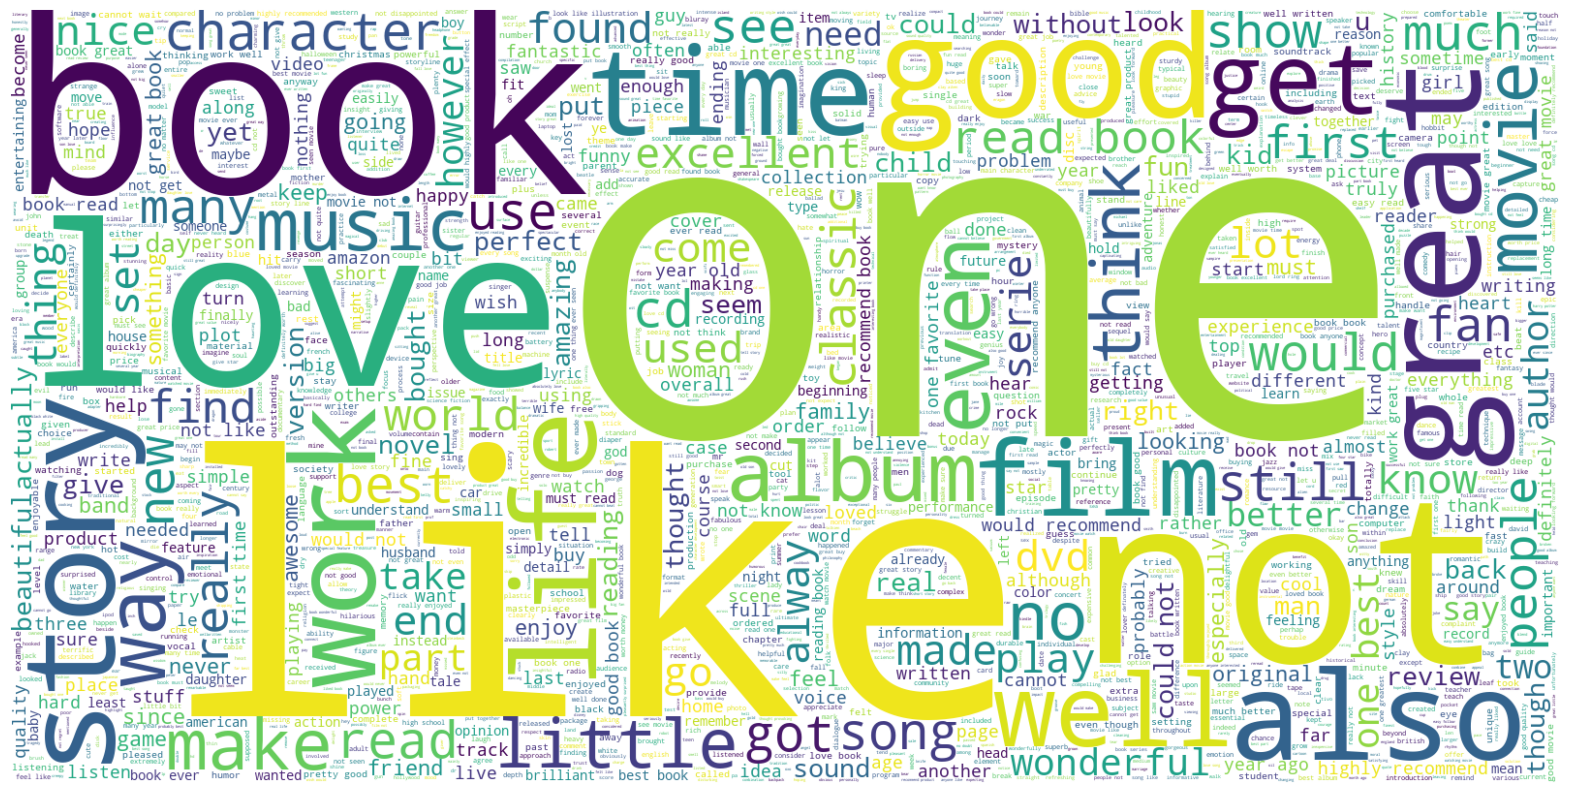

In [14]:
# Positive reviews

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , mode='RGBA', background_color='white', width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df_train[df_train['Label'] == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')

Text(0.5, 0, 'Words')

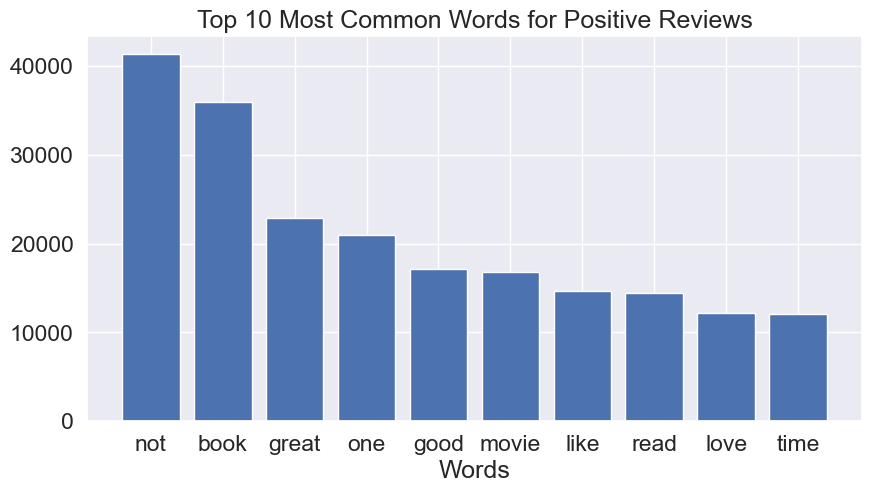

In [15]:
# Positive reviews

positive_reviews_train = df_train[df_train['Label'] == 1]
text = ' '.join(positive_reviews_train['text'])
tokens = word_tokenize(text)
freq_dist = nltk.FreqDist(tokens)
top_words = freq_dist.most_common(10)
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title('Top 10 Most Common Words for Positive Reviews')
plt.xlabel('Words')

(-0.5, 1599.5, 799.5, -0.5)

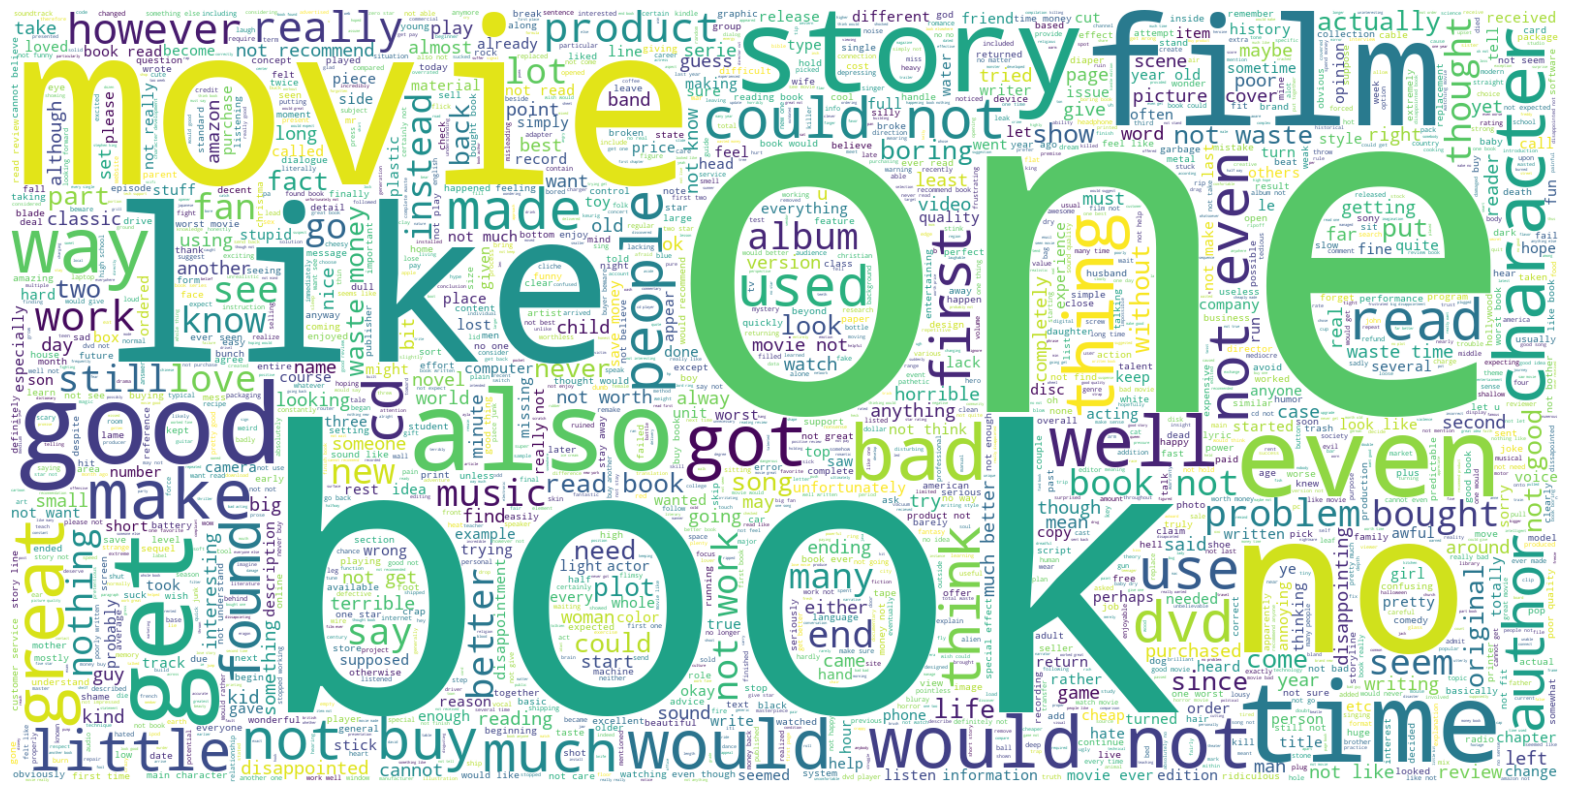

In [16]:
# Negative reviews

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , mode='RGBA', background_color='white', width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df_train[df_train['Label'] == 0].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')

Text(0.5, 0, 'Words')

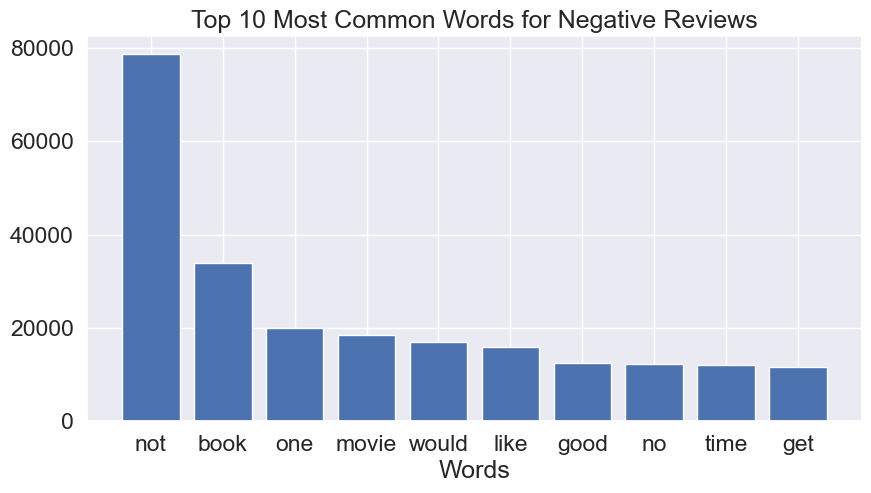

In [17]:
neg_reviews_train = df_train[df_train['Label'] == 0]
text = ' '.join(neg_reviews_train['text'])
tokens = word_tokenize(text)
freq_dist = nltk.FreqDist(tokens)
top_words = freq_dist.most_common(10)
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title('Top 10 Most Common Words for Negative Reviews')
plt.xlabel('Words')

**Observations**:

The word cloud for both the positive and negative reviews under the training dataset share many similarities. Words like "book", "one" and "read" are the most common cowrds in both reviews and this is not unexpected given the context of this dataset is reviews from amazon. 

Observable differences include greater occurances of the words "great" and "love" under positive reviews and greater occurances of "bad" and "not" under negative reviews. 

## Part III - Base Models Builiding & Exploration

### Preprocessing

Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics.

TF-IDF Vectorizer and Count Vectorizer are both methods used in natural language processing to vectorize text. However, there is a fundamental difference between the two methods.

CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach), while TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also how important that word is to the whole corpus. This is done by penalizing words that often appear across all documents, reducing the count of these as these words are likely to be less important

In [18]:
tv = TfidfVectorizer(max_features=20000)
cv = CountVectorizer(max_features=20000)



In [19]:
x_train_tv = tv.fit_transform(df_train['text']).toarray()
x_test_tv = tv.transform(df_test['text']).toarray()

x_train_cv = cv.fit_transform(df_train['text']).toarray()
x_test_cv = cv.transform(df_test['text']).toarray()



Since TfidfVectorizer seems to have higher accuracy for both Decision Tree and KNN models as seen in our proposal,
we will use TfidfVectorizer for our remaining models. 

### Model 1 - KNN Model

#### Using TfidfVectorizer

In [20]:
import warnings
warnings.filterwarnings('ignore')

knn = KNeighborsClassifier()

knn.fit(x_train_tv, df_train['Label'])
y_pred_tv = knn.predict(x_test_tv)
print("KNN Results - TfidfVectorizer")

# Model Accuracy, how often is the classifier correct?
print("KNN model Accuracy: \n", accuracy_score(df_test['Label'], y_pred_tv))
print("KNN Tree Confusion Matrix: \n", confusion_matrix(df_test['Label'], y_pred_tv))
print("KNN Classification Matrix: \n", metrics.classification_report(df_test['Label'], y_pred_tv))

KNN Results - TfidfVectorizer
KNN model Accuracy: 
 0.67952
KNN Tree Confusion Matrix: 
 [[ 6118  6039]
 [ 1973 10870]]
KNN Classification Matrix: 
               precision    recall  f1-score   support

           0       0.76      0.50      0.60     12157
           1       0.64      0.85      0.73     12843

    accuracy                           0.68     25000
   macro avg       0.70      0.67      0.67     25000
weighted avg       0.70      0.68      0.67     25000



### Model 2 - Decision Tree Model

#### Using TfidfVectorizer

In [21]:
import warnings
warnings.filterwarnings('ignore')

dt = DecisionTreeClassifier()

dt.fit(x_train_tv, df_train['Label'])
y_pred_tv = dt.predict(x_test_tv)
print("Decision Tree Results - TfidfVectorizer")

# Model Accuracy, how often is the classifier correct?
print("Decision Tree Accuracy: \n", accuracy_score(df_test['Label'], y_pred_tv))
print("Decision Tree Confusion Matrix: \n", confusion_matrix(df_test['Label'], y_pred_tv))
print("Decision Tree Classification Matrix: \n",metrics.classification_report(df_test['Label'], y_pred_tv))

Decision Tree Results - TfidfVectorizer
Decision Tree Accuracy: 
 0.75712
Decision Tree Confusion Matrix: 
 [[9080 3077]
 [2995 9848]]
Decision Tree Classification Matrix: 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75     12157
           1       0.76      0.77      0.76     12843

    accuracy                           0.76     25000
   macro avg       0.76      0.76      0.76     25000
weighted avg       0.76      0.76      0.76     25000



**Observations**:

Accuracy score is higher by around 0.04 with TfidfVectorizer for Decision Tree.

## Part IV - Advanced Models Builiding & Exploration

We will now define X_train using the TfidfVectorizer datasets accordingly.

In [22]:
#Define data
X_train = x_train_tv
y_train = df_train['Label']
X_test = x_test_tv
y_test = df_test['Label']

### Model 1 - Naive Bayes Model

We first define a Naive Bayes model and the hyperparameters to tune using GridSearchCV. We also specify a 5-fold cross-validation using cv=5.

We then fit the optimizer to the training data using grid_search.fit, which searches through the hyperparameters specified in parameters to find the best model. Finally, we use the best hyperparameters to make predictions on the test data and calculate the accuracy of the predictions using accuracy_score.

The hyperparameter alpha is the most important hyperparameter for the SVM model. The alpha hyperparameter is a smoothing parameter that controls the amount of smoothing applied to the data. The alpha parameter is a non-negative value that controls the strength of the smoothing. A larger value of alpha results in more smoothing, while a value of 0 corresponds to no smoothing at all.

When alpha is set to 1.0, the model uses additive smoothing, also known as Laplace smoothing or add-one smoothing. This means that one count is added to each feature for each class, which has the effect of avoiding zero probabilities in case a feature does not occur in a particular class in the training data. This is important because zero probabilities can cause problems in the Naive Bayes algorithm, which assumes that all features are conditionally independent given the class.

In practice, the optimal value of alpha depends on the specific characteristics of our data and our modeling goals. A larger value of alpha can help to reduce overfitting, but may also result in underfitting if the data is not noisy. Conversely, a smaller value of alpha can help to capture the details of the data, but may also result in overfitting if the data is noisy. Therefore, it is often necessary to tune the alpha parameter using techniques like cross-validation to find the optimal value for our dataset.

In [23]:
# Define the NB model & data
model = MultinomialNB()

# Define the hyperparameters to tune using GridSearchCV
parameters = {
    'alpha': [0.1, 0.5, 1],  
    'fit_prior': [True, False]
}

# Define the GridSearchCV optimizer
grid_search = GridSearchCV(model, parameters, cv=5)

# Fit the optimizer to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'alpha': 1, 'fit_prior': False}


In [24]:
# Use the best hyperparameters to make predictions on the test data
y_pred = grid_search.predict(X_test)

print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Naive Bayes Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print("Naive Bayes Classification Matrix: \n",metrics.classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.84472
Naive Bayes Confusion Matrix:
 [[10313  1844]
 [ 2038 10805]]
Naive Bayes Classification Matrix: 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     12157
           1       0.85      0.84      0.85     12843

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



### Model 2 - Support Vector Machine

We first define an SVM model and the hyperparameters to tune using GridSearchCV. We also specify a 5-fold cross-validation using cv=5.

We then fit the optimizer to the training data using grid_search.fit, which searches through the hyperparameters specified in parameters to find the best model. Finally, we use the best hyperparameters to make predictions on the test data and calculate the accuracy of the predictions using accuracy_score.

The hyperparameter C is one of the most important hyperparameters for the SVM model. The C hyperparameter controls the trade-off between the margin and the misclassification error of the training data. A smaller C value will create a wider margin, allowing more margin violations but potentially better generalization to new data. A larger C value will create a narrower margin, resulting in fewer margin violations but potentially overfitting to the training data.

By using the values [0.1, 1, 10] for C, the GridSearchCV optimizer will try all possible combinations of these hyperparameters, allowing us to find the best combination that maximizes the performance of the SVM model on the training data. The specific value chosen for C depends on the dataset and the problem at hand, and may need to be adjusted based on the results of the optimizer.

In [25]:
# Define the SVM model & data
from sklearn.svm import LinearSVC
model = LinearSVC()

# Define the hyperparameters to tune using GridSearchCV
parameters = {'C': [0.1, 1, 10]}

# Define the GridSearchCV optimizer
grid_search = GridSearchCV(model, parameters, cv=5)
print("Grid Search Done.")
# Fit the optimizer to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Grid Search Done.
Best hyperparameters:  {'C': 0.1}


From the model above, best hyperparameters are as following:  {'C': 1}

In [26]:
# Use the best hyperparameters to make predictions on the test data
y_pred = grid_search.predict(X_test)

print("SVC Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("SVC Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print("SVC Classification Matrix: \n",metrics.classification_report(y_test, y_pred))

SVC Accuracy: 0.88872
SVC Confusion Matrix:
 [[10676  1481]
 [ 1301 11542]]
SVC Classification Matrix: 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     12157
           1       0.89      0.90      0.89     12843

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



### Model 3 (SOTA) - CNN-Bidirectional-LSTM Model

The LSTM model is a specialised kind of Recurrent Neural Network. In particular it has a "forget" gate, which allows the neural network to discard unimportant components of sentences. Like other RNNs, a LSTM model deals with sequential data, such as text. In particular, we use Bidirectional LSTM layers, which will take into account forward and backward sequences, which enhances the learning of the network.

Additionally, a 1-D CNN layer is positioned before the Bidirectional LSTM layer in order to extract local features of text.

As a result of the model's adaptability, we can allow the neural network to learn what words are unimportant, which allows us to not eliminate stopwords, which are previously removed in the other modeks. This has an important advantage over traditional methods. This model will take into account the position of words within a sentence. For instance "not bad but good" is positive, while "not good but bad" is negative. Furthermore, taking into the account text as a sequence allows the neural network to understand context to a better extend than just simply detecting the count or presence of certain words/tokens.


### Text Processing
First, we lemmatize words, mapping them to their respective root words. For example, "eats" becomes "eat". Then, words are converted into integer tokens. Due to possible spelling mistakes or abbreviations, not all integer tokens represent a unique word. For example, if one misspells "celery" as "calery", these two words will be converted into distinct integer tokens. Furthermore, proper nouns such as  "kentucky" will be considered as distinct words. For this reason, we only consider the top 50000 most-used words.

In [27]:
lemmatizer = WordNetLemmatizer()
def lemmatize_process(words, lemmatizer):
    words = re.findall(r"[\w']+|[.,!?;]", words)
    words = [lemmatizer.lemmatize(w) for w in words]
    return words

df_train['text_adv'] = df_train['text_adv'].map(lambda x: lemmatize_process(x, lemmatizer))
print("1/3 done")
df_test['text_adv'] = df_test['text_adv'].map(lambda x: lemmatize_process(x, lemmatizer))
print("2/3 done")
df_train = df_train.sample(frac=1)
df_test = df_test.sample(frac=1)
print("3/3 done")

1/3 done
2/3 done
3/3 done


In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['text_adv'])
vocab = len(tokenizer.word_index) + 1 
print(f"vocabulary: {vocab}")
vocab = min(50000, vocab) 
print(f"Chosen vocabulary size: {vocab}")

train_sequences = tokenizer.texts_to_sequences(df_train['text_adv'])
data_train = pad_sequences(train_sequences, maxlen=average_input_size, padding='post', truncating='post')
print("1/2 done")
test_sequences = tokenizer.texts_to_sequences(df_test['text_adv'])
data_test =  pad_sequences(test_sequences, maxlen=average_input_size, padding='post', truncating='post')
print("2/2 done")

vocabulary: 128125
Chosen vocabulary size: 50000
1/2 done
2/2 done


### Model Architecture
This is a sequential neural network model with CNN as well as Bidirectional LSTM layers. The embedding layer first converts each integer token into an n-dimensional array, where n is a hyperparameter. The greater n is, the better the model will be able to capture relations between words. However, this is only effective to a certain extend, and an n too great may result in overfitting. 

As outlined in our paper, the next layer is a CNN layer which will look at local features about each token, and extract this information. This helps to account for the idea that some words, when placed in proximity with other words, change the meaning of the phrase. e.g. "not good".

The bi-directional LSTM layers that follow treat the series of tokens (a review) as sequences, which helps the neural network understand the underlying context of the review, rather than simply capturing the presence of words. The presence of multiple LSTM layers helps to abstract out possible nested sequences, which aids learning even further.

As mentioned briefly, this model has to be tuned as well. In particular, the kernel size of the CNN layer, learning rate, dimension of the embedding vector, the number of convolutional filters and the pool size of the 1-D max-pooling layer are hyperparameters to be tuned.

In [29]:
def build_model(hp):
    
    dims = hp.Int('dims', min_value=48, max_value=96, step=16)
    kernel_size = hp.Int('kernel_size', min_value=3, max_value=6, step=1)
    filters = hp.Int('filters', min_value=24, max_value=96, step=16)
    pool_size = hp.Int('pool_size', min_value=2, max_value=8, step=2)
    learn_rate = hp.Choice('learn_rate', values=[1e-4, 5e-5])
    
    model = Sequential(name="LSTM_Sentiment_Classifier")
    model.add(Embedding(vocab, dims, input_length=average_input_size))
    model.add(Dropout(0.3))
    model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
    model.add(MaxPooling1D(pool_size=pool_size, strides=1))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.3))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dropout(0.2))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='sigmoid')) 
    
    model.compile(loss='binary_crossentropy', optimizer= keras.optimizers.Adam(learning_rate=learn_rate), metrics=['accuracy'])
    
    return model

In [30]:
tuner = kt.Hyperband(build_model, objective='val_accuracy',max_epochs=16,factor=3,directory='kt_p1',project_name='CNN-BiLSTM-Classifier', overwrite=True)

In [31]:
X_train, X_test, y_train, y_test = data_train, data_test, df_train['Label'], df_test['Label']

### Hyperparameter Tuning

In [32]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 3)
tuner.search(X_train, y_train, validation_split=0.2, callbacks=[stop_early])


Trial 30 Complete [00h 17m 37s]
val_accuracy: 0.8797000050544739

Best val_accuracy So Far: 0.8973000049591064
Total elapsed time: 03h 26m 38s
INFO:tensorflow:Oracle triggered exit


In [33]:
best_hps=tuner.get_best_hyperparameters(num_trials=10)[0]
print("Best hyperparameters:")
print(f"{best_hps.values}")
print("\n\n")

tuner.results_summary()

Best hyperparameters:
{'dims': 96, 'kernel_size': 3, 'filters': 72, 'pool_size': 2, 'learn_rate': 0.0001, 'tuner/epochs': 16, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}



Results summary
Results in kt_p1\CNN-BiLSTM-Classifier
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0026 summary
Hyperparameters:
dims: 96
kernel_size: 3
filters: 72
pool_size: 2
learn_rate: 0.0001
tuner/epochs: 16
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8973000049591064

Trial 0016 summary
Hyperparameters:
dims: 48
kernel_size: 3
filters: 40
pool_size: 2
learn_rate: 5e-05
tuner/epochs: 16
tuner/initial_epoch: 6
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.8940500020980835

Trial 0014 summary
Hyperparameters:
dims: 48
kernel_size: 3
filters: 40
pool_size: 2
learn_rate: 5e-05
tuner/epochs: 6
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0011
Score: 0.8933500051498413

Trial 0017 summary
Hyperparamete

### Building and Training the model

In [34]:
model = tuner.hypermodel.build(best_hps)
print(model.summary())

Model: "LSTM_Sentiment_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 80, 96)            4800000   
                                                                 
 dropout_3 (Dropout)         (None, 80, 96)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 78, 72)            20808     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 77, 72)           0         
 1D)                                                             
                                                                 
 bidirectional_2 (Bidirectio  (None, 77, 256)          205824    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 77, 2

#### Results

Epoch 1/6
2500/2500 [==============================] - 91s 35ms/step - loss: 0.4102 - accuracy: 0.7978 - val_loss: 0.3153 - val_accuracy: 0.8670
Epoch 2/6
2500/2500 [==============================] - 88s 35ms/step - loss: 0.2497 - accuracy: 0.9006 - val_loss: 0.2519 - val_accuracy: 0.8982
Epoch 3/6
2500/2500 [==============================] - 89s 36ms/step - loss: 0.2030 - accuracy: 0.9228 - val_loss: 0.2514 - val_accuracy: 0.8990
Epoch 4/6
2500/2500 [==============================] - 86s 34ms/step - loss: 0.1699 - accuracy: 0.9363 - val_loss: 0.2507 - val_accuracy: 0.9009
Epoch 5/6
2500/2500 [==============================] - 87s 35ms/step - loss: 0.1411 - accuracy: 0.9494 - val_loss: 0.2699 - val_accuracy: 0.8960
Epoch 6/6
2500/2500 [==============================] - 87s 35ms/step - loss: 0.1184 - accuracy: 0.9586 - val_loss: 0.2699 - val_accuracy: 0.9018


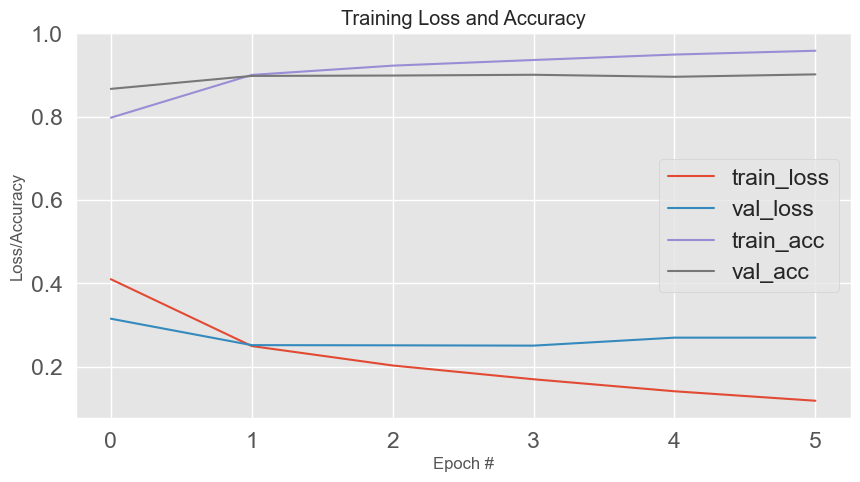

In [35]:
def generate_plot(H):
# plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(H.history["loss"], label="train_loss")
    plt.plot(H.history["val_loss"], label="val_loss")
    plt.plot(H.history["accuracy"], label="train_acc")
    plt.plot(H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    
H = model.fit(X_train, y_train,validation_split=0.2, epochs = 6)
generate_plot(H)

In [36]:
y_prediction = model.predict(X_test)
print(model.evaluate(X_test, y_test))
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, np.round(y_prediction), normalize= 'pred')
print(result)
print(metrics.classification_report(y_test, np.round(y_prediction)))

782/782 [==============================] - 9s 11ms/step - loss: 0.2925 - accuracy: 0.8915
[0.2925494909286499, 0.8915200233459473]
[[0.88718537 0.10435054]
 [0.11281463 0.89564946]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12157
           1       0.90      0.89      0.89     12843

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

